<a href="https://colab.research.google.com/github/SabeehaMazahir/MachineLearning/blob/main/ML_CW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Census Income Dataset - ML CW**

## Load necessary Python libraries

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Pretty display for notebooks
%matplotlib inline

## Load the dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
df = adult.data.original

In [5]:
df.shape

(48842, 15)

In [6]:
df.head(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data Exploration

In [7]:
# summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# number of unique values in each column
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [9]:
# summary statistics
# .T transposes the table, so rows become columns, makes it easier to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Identifying Missing Values

In [10]:
# Checking for missing values
# number of null values/missing values
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
# Value counts for categorical features which have missing values - workclass, occupation, and native-country
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### Handling Missing Values

In [14]:
# replace '?' with NaN across the entire DataFrame
df = df.replace('?', np.nan)

In [15]:
# Checking the missing values again
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [16]:
# Handling missing values
df['workclass'] = df['workclass'].fillna('Private')
df['occupation'] = df['occupation'].fillna('Prof-specialty')
df['native-country'] = df['native-country'].fillna('United-States')

In [17]:
# Checking if theres missing data once again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
# Handling the duplicates
# no of duplicates
df.duplicated().sum()

29

In [19]:
# Dropping the duplicates
df = df.drop_duplicates()

### Handling inconsistent data

In [20]:
df['income'].value_counts()

<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: income, dtype: int64

In [21]:
# Replace the income values to ensure consistency
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Verify the changes
print(df['income'].value_counts())

<=50K    37128
>50K     11685
Name: income, dtype: int64


<ipython-input-21-9b38a7b10409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


## Data Visualization

<Axes: xlabel='income', ylabel='count'>

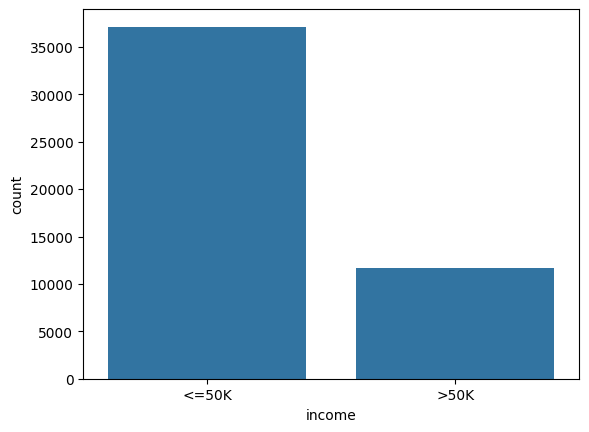

In [22]:
sns.countplot(x = df['income'])

<Axes: xlabel='count', ylabel='workclass'>

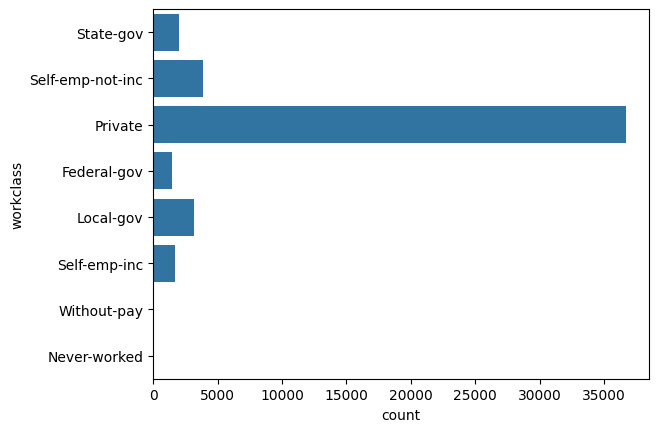

In [23]:
#Plot the unique values in workclass column
sns.countplot(df['workclass'])

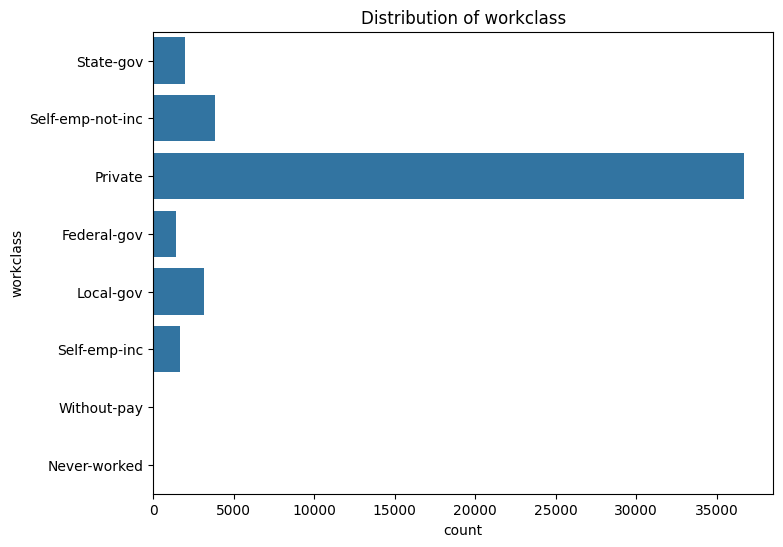

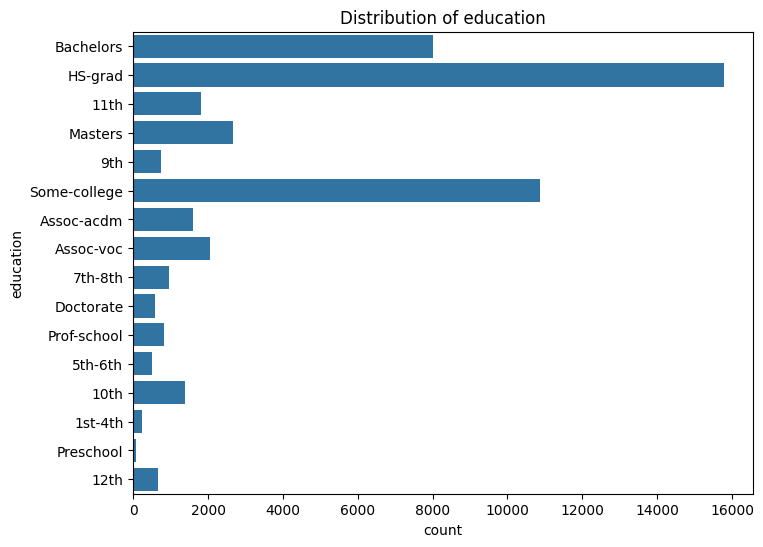

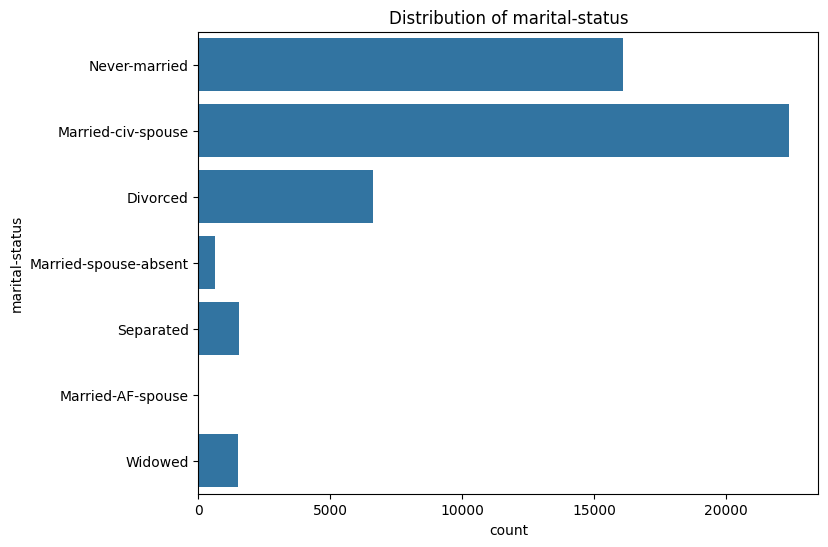

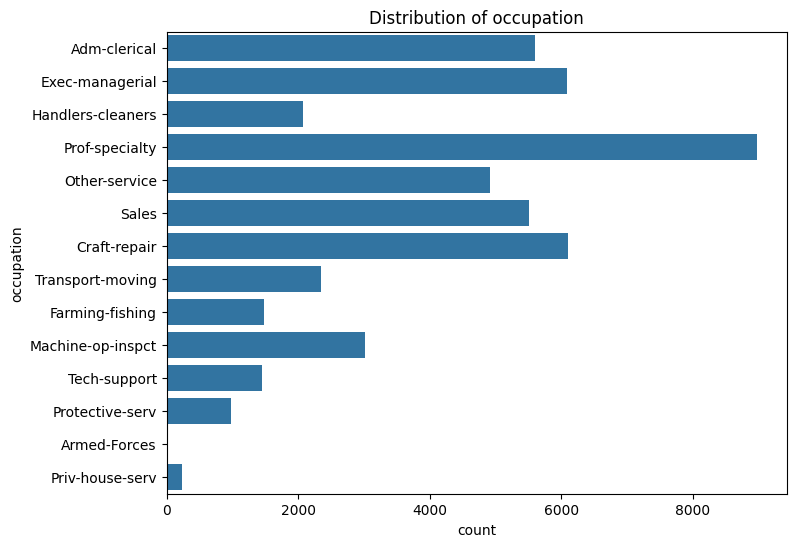

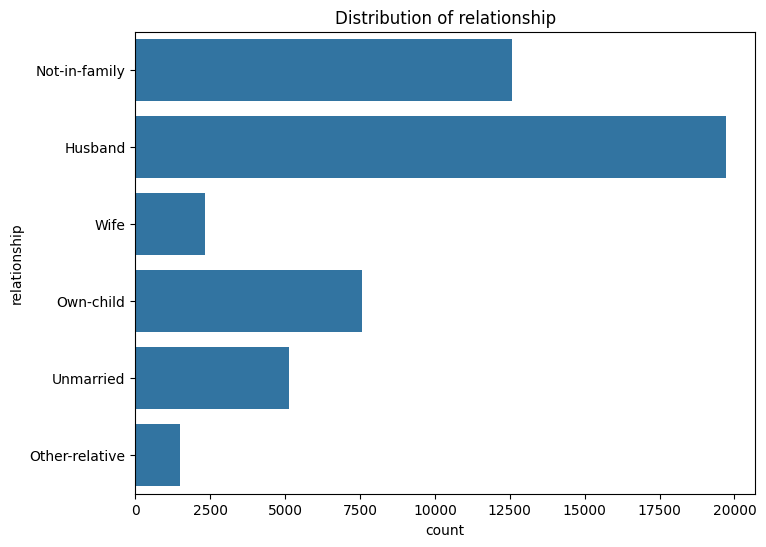

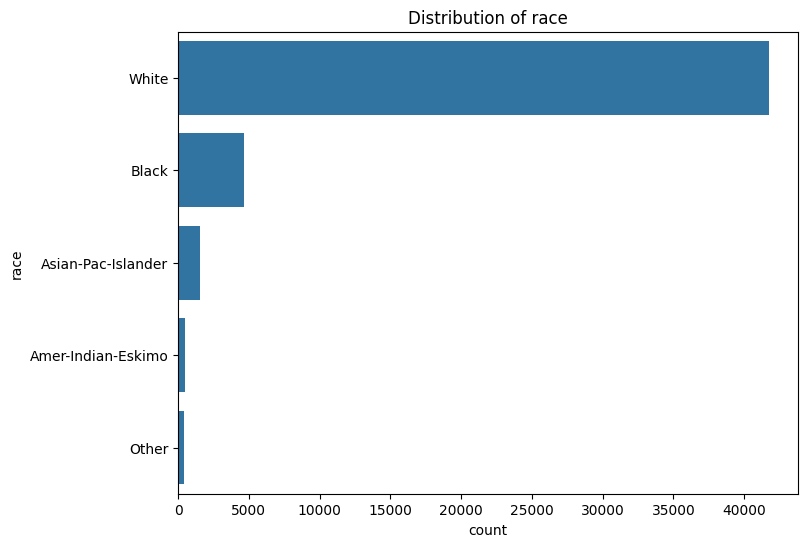

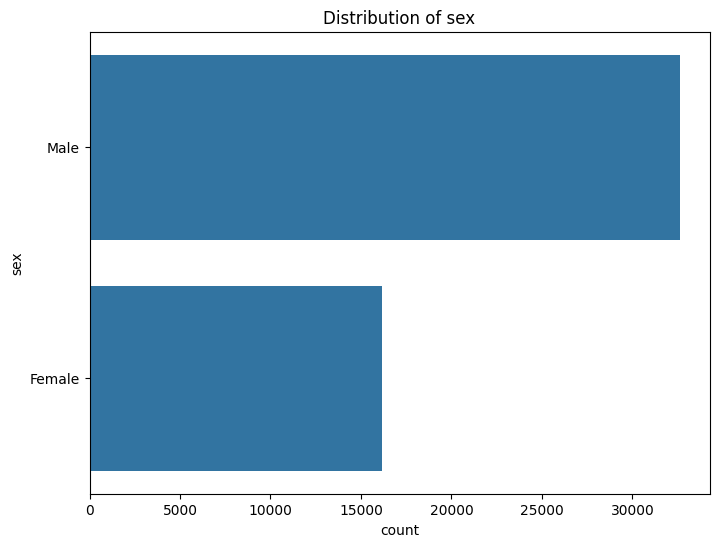

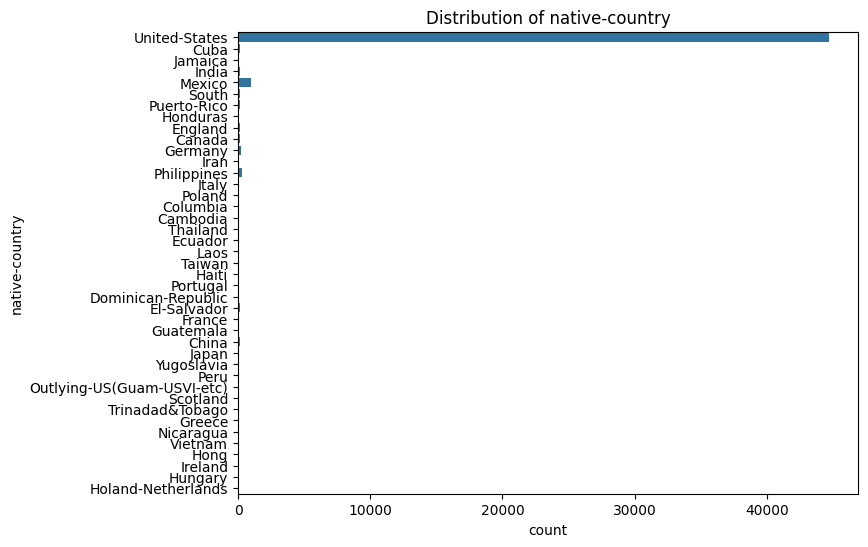

In [24]:
# Categorical Columns - Plotting the Count Plots
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Plot for Categorical Columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()
    print("\n")

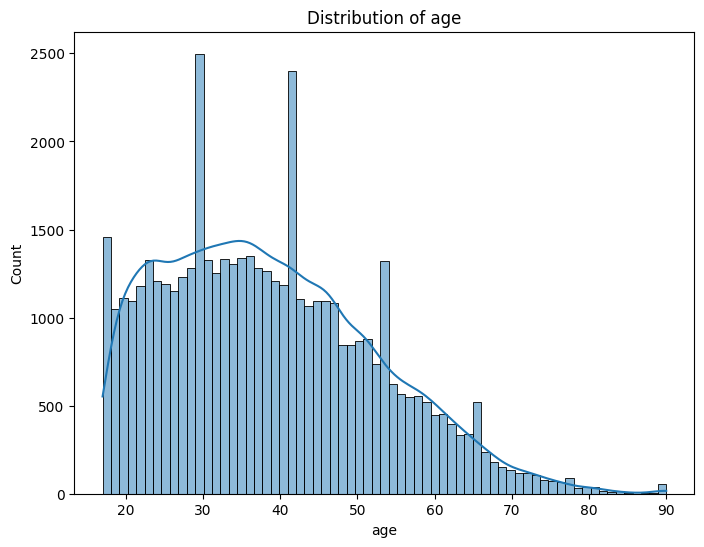

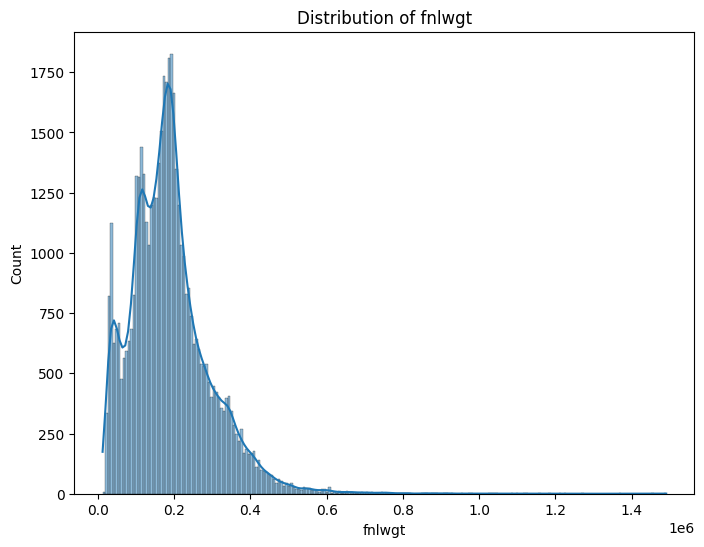

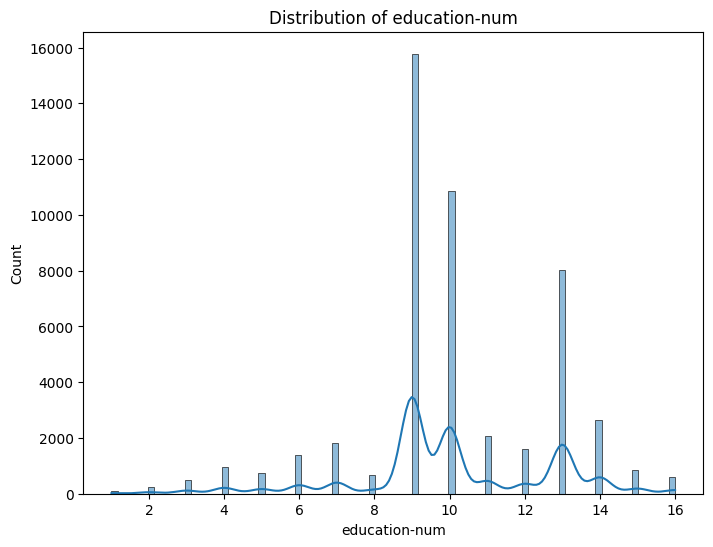

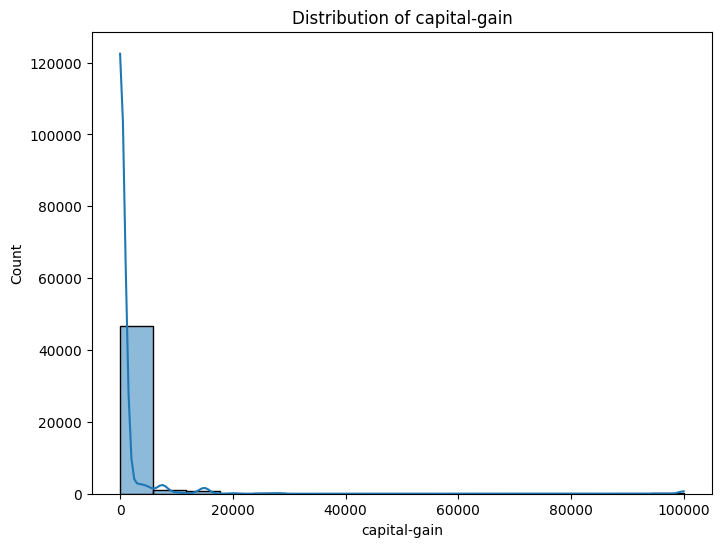

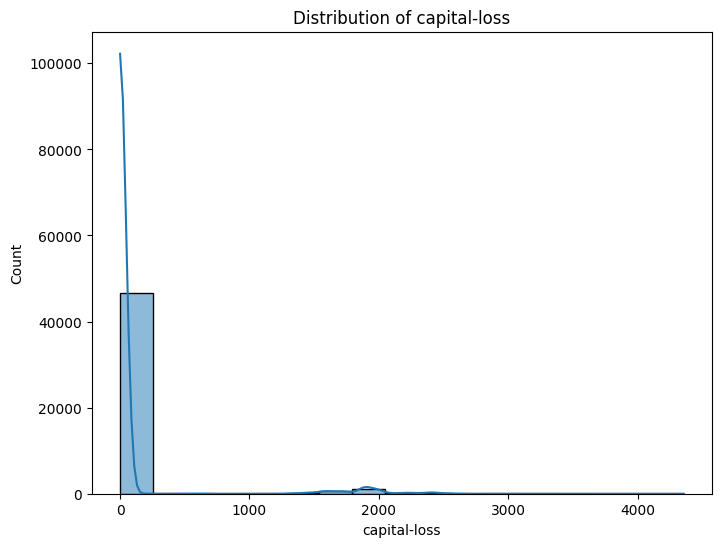

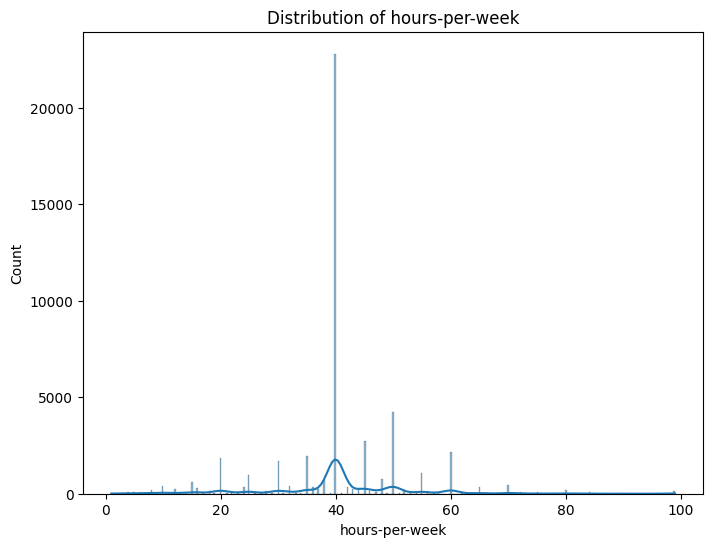

In [25]:
# Continuous Columns - Plotting the Histograms
continuous_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Plot for Continuous Columns
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
    print("\n")

<ipython-input-26-5e1c43acbdbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


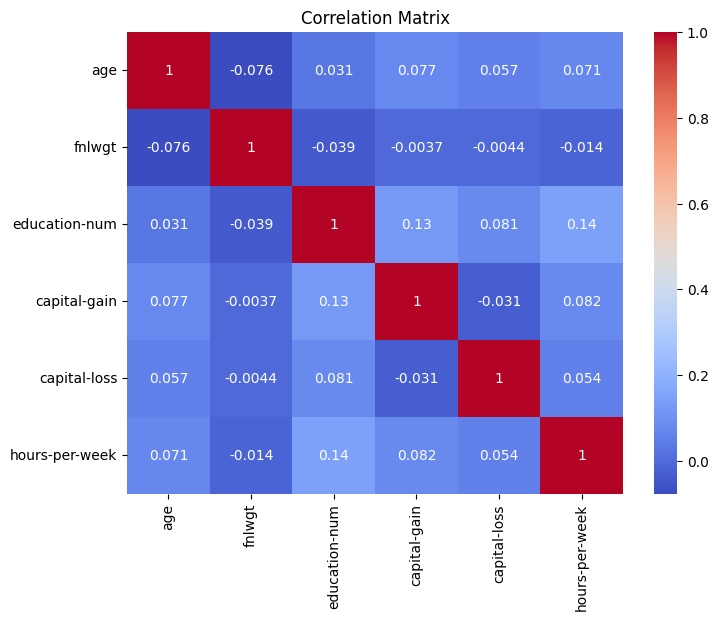

In [26]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering and Preprocessing

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

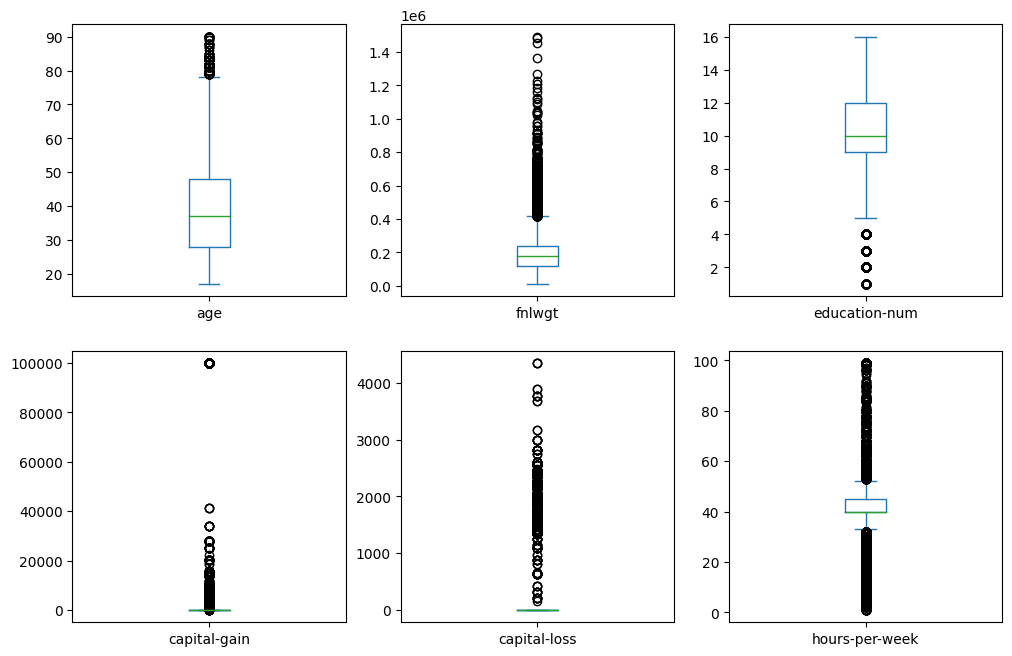

In [27]:
# Boxplot - to detect the outliers
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [28]:
# outliers in age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Defining an outlier
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

print("Number of outliers in 'age': ", len(outliers))

Number of outliers in 'age':  215


In [29]:
# Capping outliers for 'age'
df['age'] = np.where(df['age'] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['age'])
df['age'] = np.where(df['age'] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['age'])

In [30]:
# Define a function to detect outliers in a column
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

# Apply the function to each column
for column in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
    outliers = detect_outliers(df, column)
    print(f"Number of outliers in '{column}':", len(outliers))

Number of outliers in 'age': 0
Number of outliers in 'fnlwgt': 1453
Number of outliers in 'education-num': 1789
Number of outliers in 'capital-gain': 4035
Number of outliers in 'capital-loss': 2282
Number of outliers in 'hours-per-week': 13489


In [31]:
def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])

# Columns to apply capping
columns_to_cap = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Apply the capping function to each column
for column in columns_to_cap:
    cap_outliers(df, column)

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

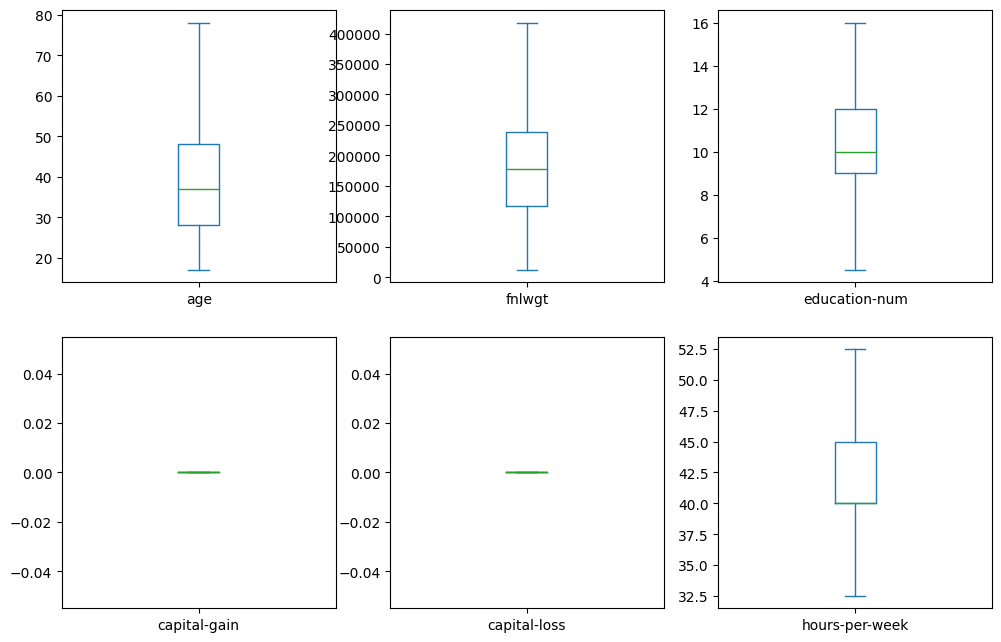

In [32]:
# Boxplot - to recheck the outliers
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [33]:
# feature engineering on: income - convert to numeric as 0s and 1s
df.income = df.income.replace(['<=50K'], 0)
df.income = df.income.replace(['>50K'], 1)

In [34]:
# feature engineering - marital status: make it simpler by reducing the categories
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].replace(['Never-married', 'not-married'])
df['marital-status'] = df['marital-status'].replace(['Married-spouse-absent', 'Divorced', 'Separated', 'Widowed'], 'other')

In [35]:
# One-hot encoding applied to the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [36]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516.0,13.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419.0,13.0,0.0,0.0,36.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,64.0,321403.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,38.0,374983.0,13.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,44.0,83891.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# checking for duplicates again
df.duplicated().sum()

53

In [38]:
# Dropping duplicates
df = df.drop_duplicates()

In [39]:
df.shape

(48760, 94)

## Model Training and Evaluation

In [40]:
# Splitting the data into training and test sets
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

# train the model
nbc = GaussianNB()
nbc.fit(X_train, y_train)
# evaluate our model
prediction = nbc.predict(X_test)
print("Accuracy on training data: ", nbc.score(X_train, y_train))
print("Accuracy on testing data: ", nbc. score(X_test, y_test))

Accuracy on training data:  0.7868642329778507
Accuracy on testing data:  0.7828137817883511


In [42]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)  # Note: For Random Forest, we use the unscaled data
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classifier performance:
Accuracy: 0.8255742411812962
Confusion Matrix:
 [[6760  666]
 [1035 1291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7426
           1       0.66      0.56      0.60      2326

    accuracy                           0.83      9752
   macro avg       0.76      0.73      0.75      9752
weighted avg       0.82      0.83      0.82      9752



In [43]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Accuracy on training data: ", rfc.score(X_train, y_train))
print("Accuracy on testing data: ", rfc. score(X_test, y_test))

Accuracy on training data:  0.9997436423297785
Accuracy on testing data:  0.8255742411812962


In [44]:
# Random Forest - Without handling the outliers and missing values
df_rf = adult.data.original

In [45]:
df_rf = df_rf.drop_duplicates()

In [46]:
# replace '?' with NaN across the entire DataFrame
df_rf = df_rf.replace('?', np.nan)

In [47]:
# Replace the income values to ensure consistency
df_rf['income'] = df_rf['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

In [48]:
# feature engineering on: income - convert to numeric as 0s and 1s
df_rf.income = df_rf.income.replace(['<=50K'], 0)
df_rf.income = df_rf.income.replace(['>50K'], 1)

In [49]:
# feature engineering - marital status: make it simpler by reducing the categories
df_rf['marital-status'] = df_rf['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df_rf['marital-status'] = df_rf['marital-status'].replace(['Never-married', 'not-married'])
df_rf['marital-status'] = df_rf['marital-status'].replace(['Married-spouse-absent', 'Divorced', 'Separated', 'Widowed'], 'other')

In [50]:
# One-hot encoding applied to the categorical columns
df_rf = pd.get_dummies(df_rf, columns=categorical_columns, drop_first=True)

In [51]:
df_rf.duplicated().sum()

16

In [52]:
df_rf.drop_duplicates()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,64,321403,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,374983,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,44,83891,13,5455,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [53]:
# Splitting the data for Random Forest
X_rf = df_rf.drop('income', axis=1)  # Features for Random Forest
y_rf = df_rf['income']  # Target variable

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [54]:
## Random Forest Classifier - With Balancing

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_rf, y_train_rf)

# Evaluate the Random Forest Classifier
rf_predictions = rf_classifier.predict(X_test_rf)
print("\nRandom Forest Classifier performance:")
print("Accuracy on training data: ", rf_classifier.score(X_train_rf, y_train_rf))
print("Accuracy on testing data: ", rf_classifier.score(X_test_rf, y_test_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, rf_predictions))
print("Classification Report:\n", classification_report(y_test_rf, rf_predictions))


Random Forest Classifier performance:
Accuracy on training data:  0.9999487836107555
Accuracy on testing data:  0.8488169619993854
Confusion Matrix:
 [[6837  538]
 [ 938 1450]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7375
           1       0.73      0.61      0.66      2388

    accuracy                           0.85      9763
   macro avg       0.80      0.77      0.78      9763
weighted avg       0.84      0.85      0.84      9763



In [55]:
## Random Forest Classifier - Without balancing

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_rf, y_train_rf)

# Evaluate the Random Forest Classifier
rf_predictions = rf_classifier.predict(X_test_rf)
print("\nRandom Forest Classifier performance:")
print("Accuracy on training data: ", rf_classifier.score(X_train_rf, y_train_rf))
print("Accuracy on testing data: ", rf_classifier.score(X_test_rf, y_test_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, rf_predictions))
print("Classification Report:\n", classification_report(y_test_rf, rf_predictions))


Random Forest Classifier performance:
Accuracy on training data:  0.9999487836107555
Accuracy on testing data:  0.8466659838164499
Confusion Matrix:
 [[6818  557]
 [ 940 1448]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7375
           1       0.72      0.61      0.66      2388

    accuracy                           0.85      9763
   macro avg       0.80      0.77      0.78      9763
weighted avg       0.84      0.85      0.84      9763

